<a href="https://colab.research.google.com/github/jorgesolisservelion/portafolio/blob/main/Campaign_Mkt_Mailing_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case N°1 - Marketing campaign**


---

A company 'X' has budgeted for a marketing campaign in which they wish to send mass emails to a customer base. However, in order to improve conversion rates and optimize the budget, they aim to prioritize customers with the highest likelihood of conversion through email. They have access to a historical database that indicates which customers opened the email and which did not.

The project requires using data analytics and machine learning to profile the group of customers with the highest probability of opening the email.


---

* Target population: Customers who opened the email.
* Unit of analysis: Customer

In [ ]:
#Instalar los paquetes necesarios:
#!pip install "pycaret[full]"
#!pip install sweetviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import types
import matplotlib.mlab as mlab
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import os
from sklearn.model_selection import train_test_split
from pycaret.classification import *
import sweetviz
import seaborn as sns
import time
from datetime import date
from datetime import timedelta

In [3]:
# Load dataset
data = pd.read_csv('campana-Marketing.csv')
data.head()

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62,3,C,M,405,27,15,Efectivo,0
1,2,60,8,C,F,387,85,5,tc,1
2,3,59,7,C,F,366,44,8,tc,1
3,4,47,8,S,M,244,244,1,Efectivo,0
4,5,44,8,S,F,629,173,4,tc,1


**Análisis exploratorio de datos**

In [4]:
eda_obj= sweetviz.analyze(data)

eda_obj.show_html('EDA_CAMPANA_MKT' + '.html', layout='widescreen', scale = 0.8)

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_CAMPANA_MKT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
data.columns.values

array(['CLIENTE', 'EDAD', 'ANIOS_AFILIACION', 'ESTADO_CIVIL', 'SEXO',
       'CPM', 'TP', 'TXTS', 'MEDIO_PAGO', 'TARGET'], dtype=object)

In [6]:
cat = data[['ESTADO_CIVIL','SEXO','MEDIO_PAGO']]

In [7]:
cat.describe(include='all').transpose()

,count,unique,top,freq
ESTADO_CIVIL,500,4,C,292
SEXO,500,2,F,292
MEDIO_PAGO,500,3,tc,258


In [8]:
num = data[['EDAD', 'ANIOS_AFILIACION','CPM', 'TP', 'TXTS']]
num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EDAD,500.0,50.442,14.436046,18.0,39.0,49.0,61.00,90.0
ANIOS_AFILIACION,500.0,5.248,2.450818,0.0,3.0,6.0,7.00,8.0
CPM,500.0,368.688,306.928730,11.0,177.0,275.5,471.25,2879.0
TP,500.0,82.864,68.653070,6.0,37.0,63.0,105.00,459.0
TXTS,500.0,6.286,5.990658,1.0,3.0,4.0,8.00,54.0


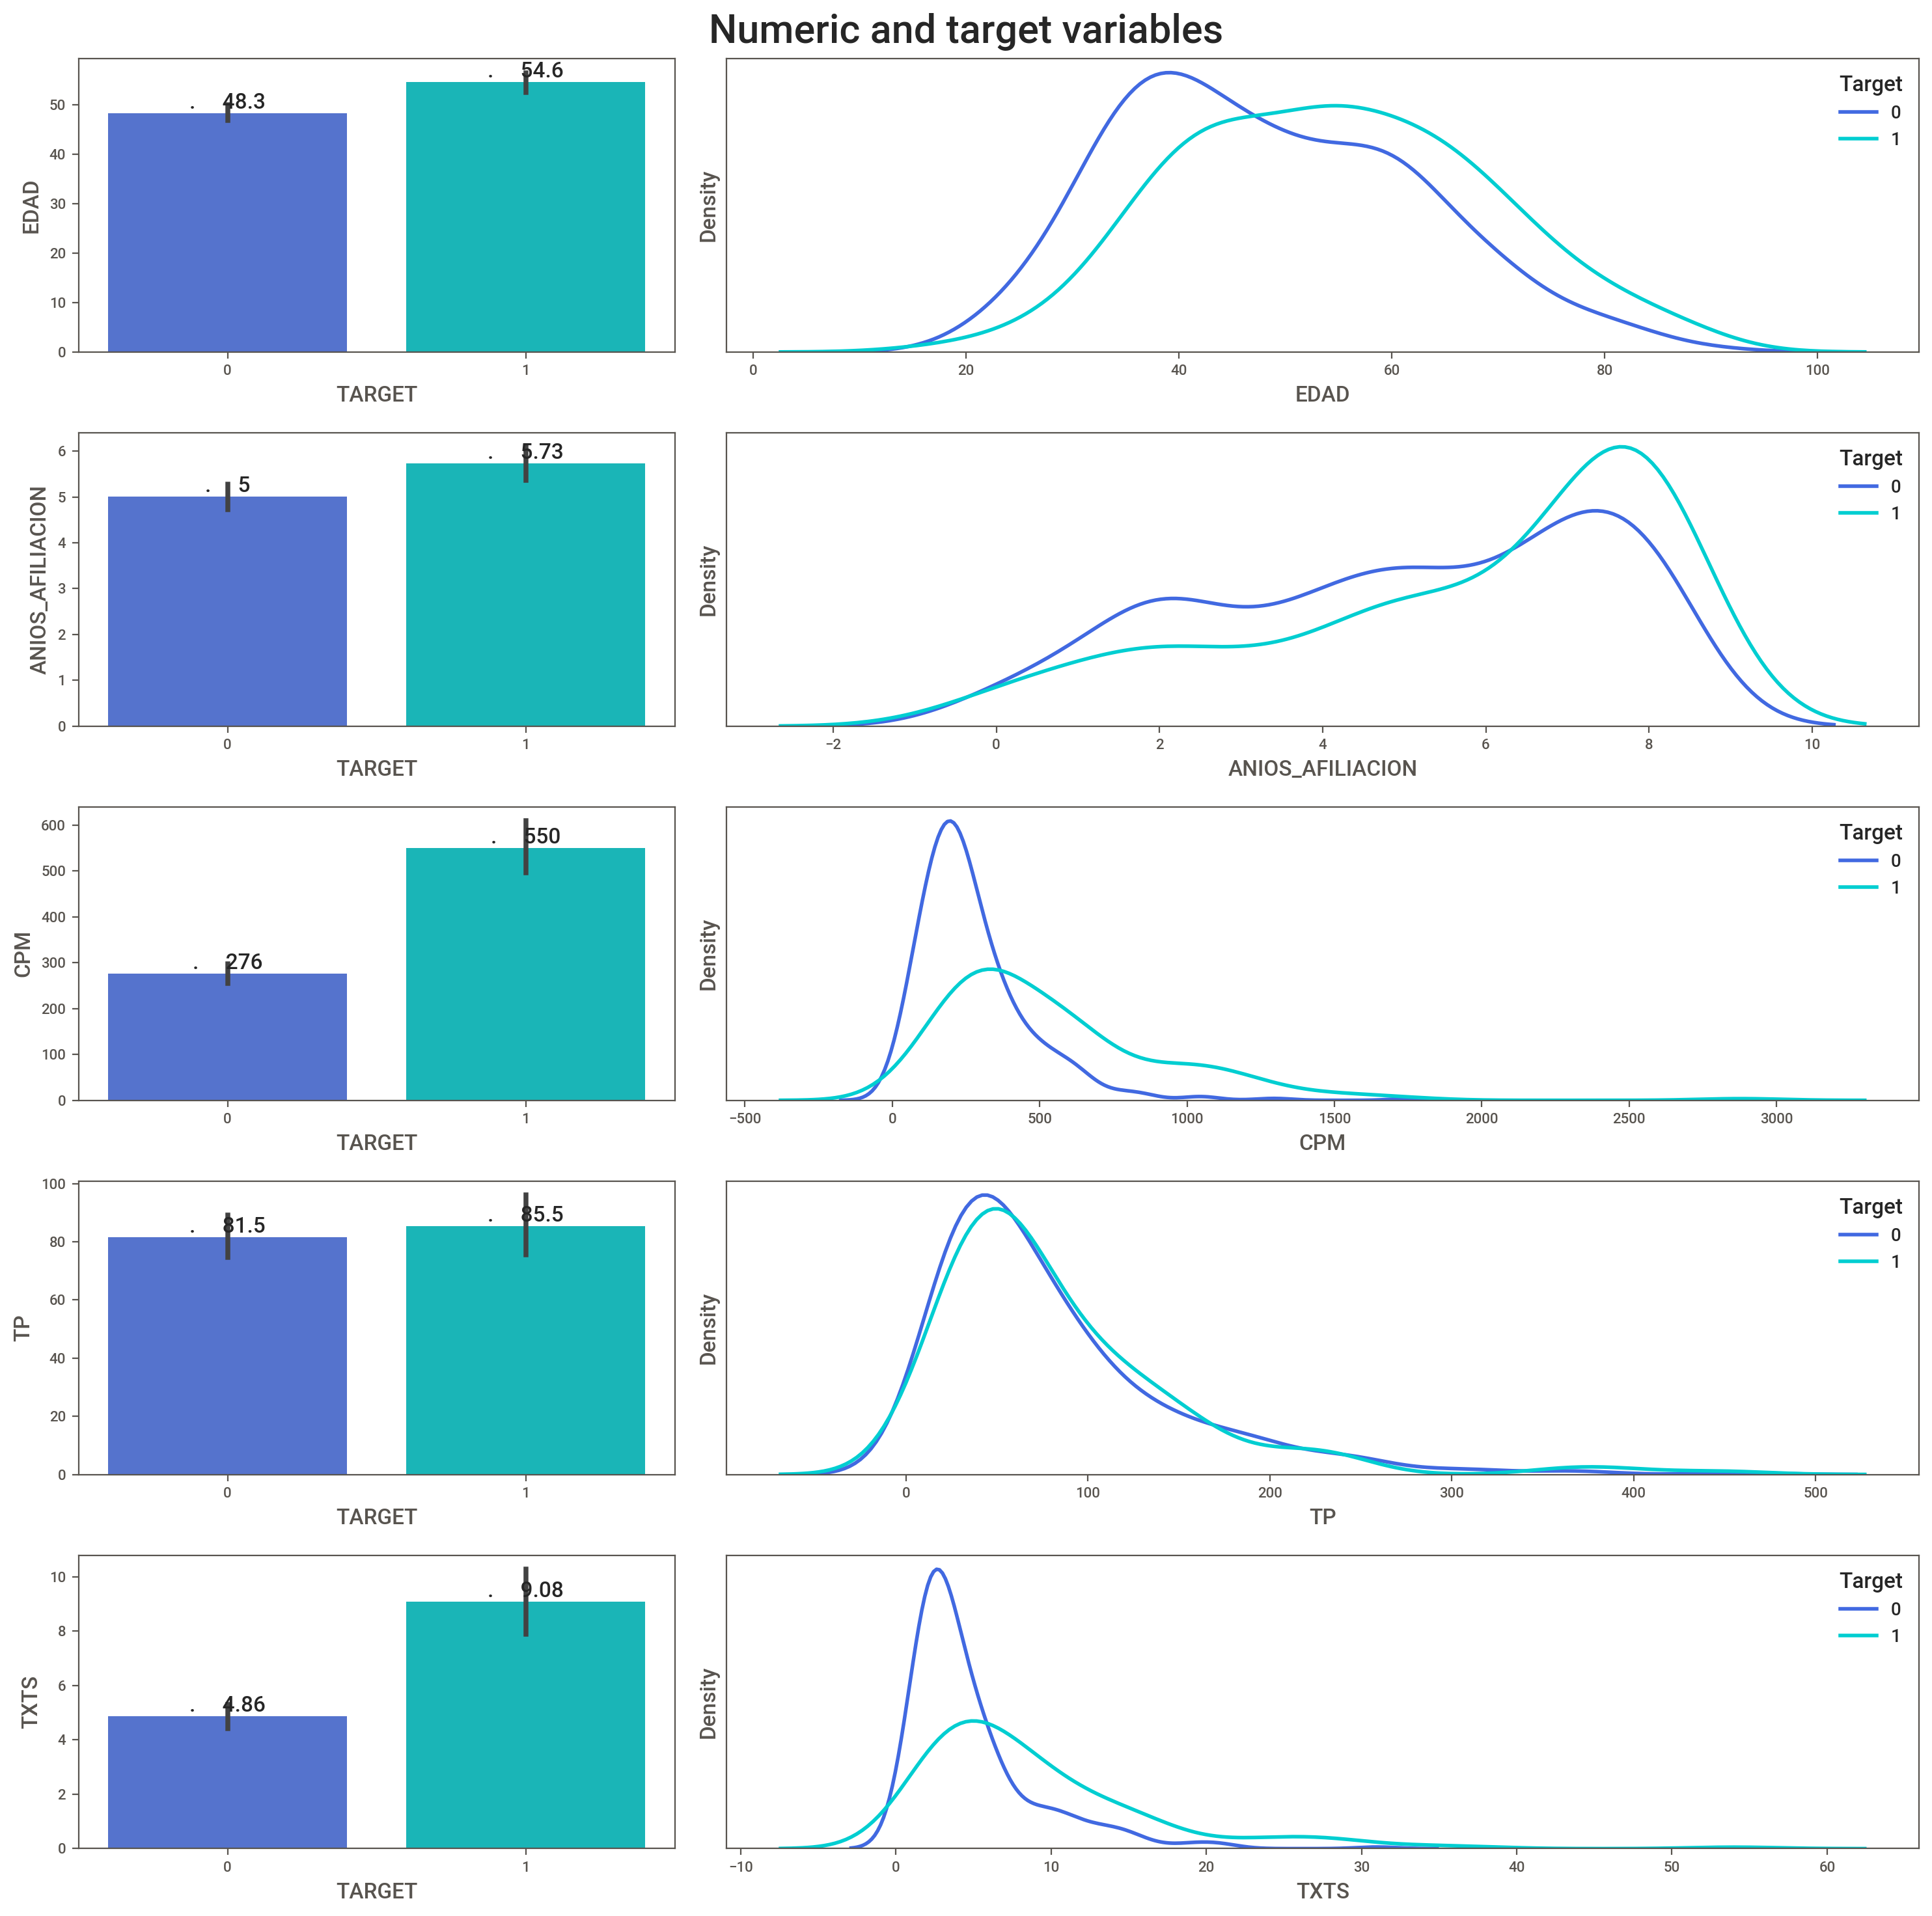

In [11]:
objetivo = 'TARGET'
Num_Features = ['EDAD', 'ANIOS_AFILIACION','CPM', 'TP', 'TXTS']

sns.set_palette(['royalblue','darkturquoise'])
fig, ax = plt.subplots(5,2,figsize=(15,15),dpi=200,gridspec_kw={'width_ratios': [1,2]})
for i,col in enumerate(Num_Features):
    #barplot
    graph = sns.barplot(data=data,x=objetivo, y=col, ax=ax[i,0])
    #kde PLOT
    sns.kdeplot(data=data[data[objetivo]==0],x=col, linewidth=2, ax=ax[i,1],label='0')
    sns.kdeplot(data=data[data[objetivo]==1],x=col, linewidth=2, ax=ax[i,1],label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title="Target",loc='upper right')
    #add bar sizes to our plot
    for cont in graph.containers:
      graph.bar_label(cont, fmt='.     %.3g')

plt.suptitle('Numeric and target variables', fontsize=22)
plt.tight_layout()
plt.show()

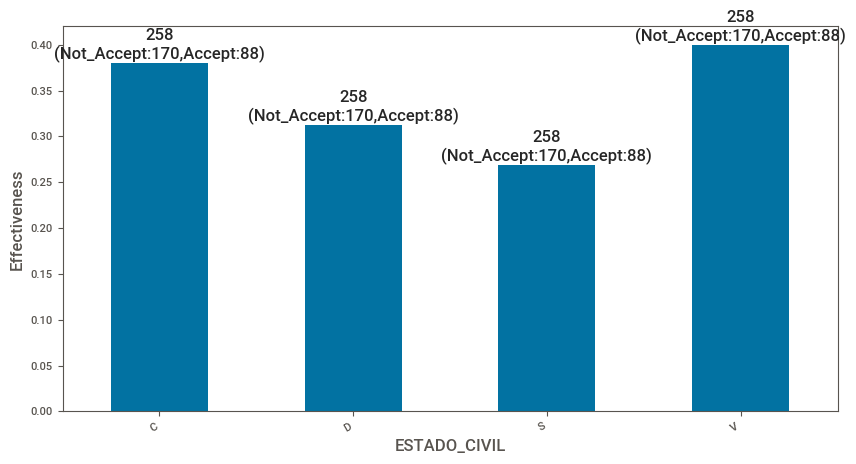

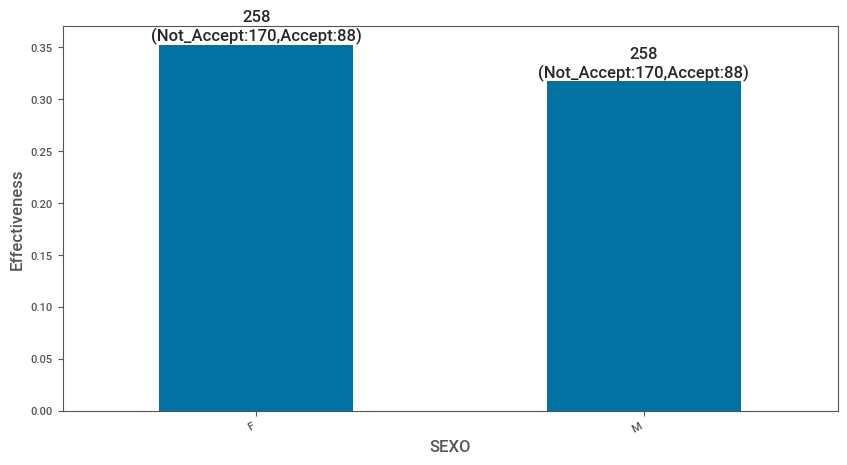

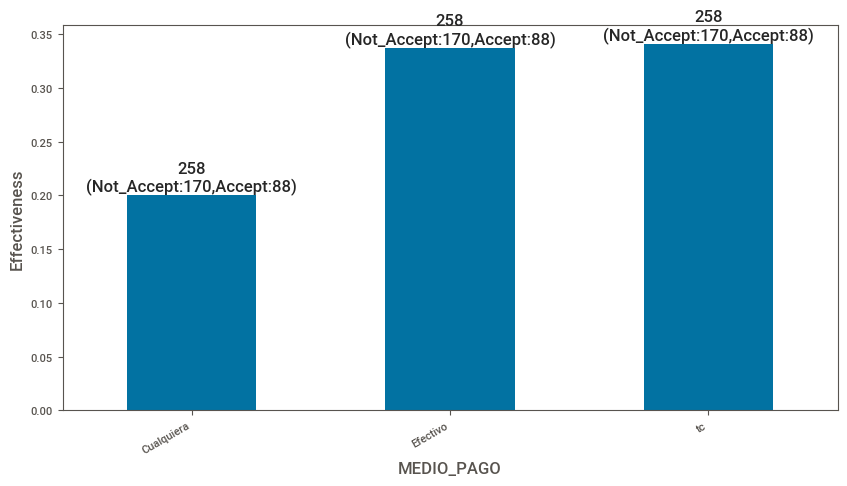

In [14]:
cat_features = ['ESTADO_CIVIL','SEXO','MEDIO_PAGO']
for i in cat_features:
    resumen = pd.concat([data[data.TARGET == 0].groupby(i).TARGET.count()
                          , data[data.TARGET == 1].groupby(i).TARGET.count()], axis=1)
    resumen.columns = ['Not_Accept','Accept']
    resumen_f = resumen.Accept / (resumen.Accept + resumen.Not_Accept)
    plt.figure(figsize=(10,5))
    ax = resumen_f.plot(kind='bar', color='b')
    ax.set_xticklabels(resumen_f.index, rotation=30, fontsize=8, ha='right')
    ax.set_xlabel(i)
    ax.set_ylabel('Effectiveness')

    # Add data quantity labels
    for j, (valor_accept, valor_not_accept) in enumerate(zip(resumen.Accept, resumen.Not_Accept)):
        total_datos = valor_acepta + valor_no_acepta
        ax.annotate(f'{total_datos}\n(Not_Accept:{valor_no_acepta},Accept:{valor_acepta})', xy=(j, resumen_f[j]), ha='center', va='bottom')


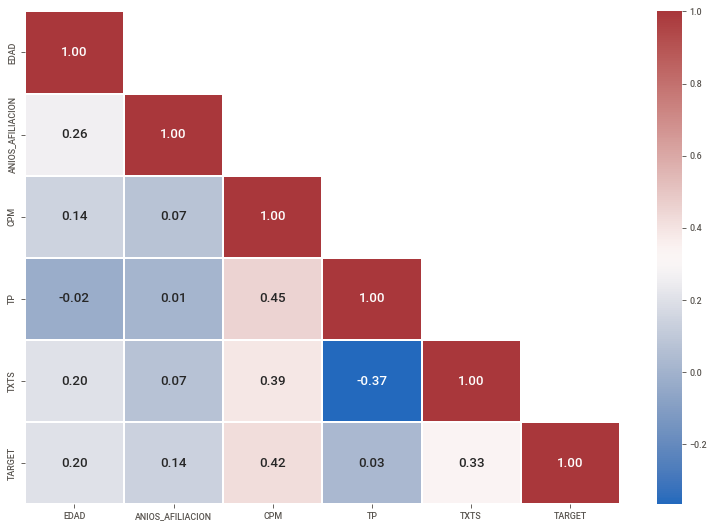

In [15]:
df = data.drop('CLIENTE', axis=1)
#Correlation Calculation
corr = df.corr(method='pearson')

#We create a mask to view the correlation on one side only.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)]=True

#Plot the heatmap correlation
plt.figure(figsize=(12,8),dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap = 'vlag', fmt='.2f', linewidths=0.2)
plt.show()

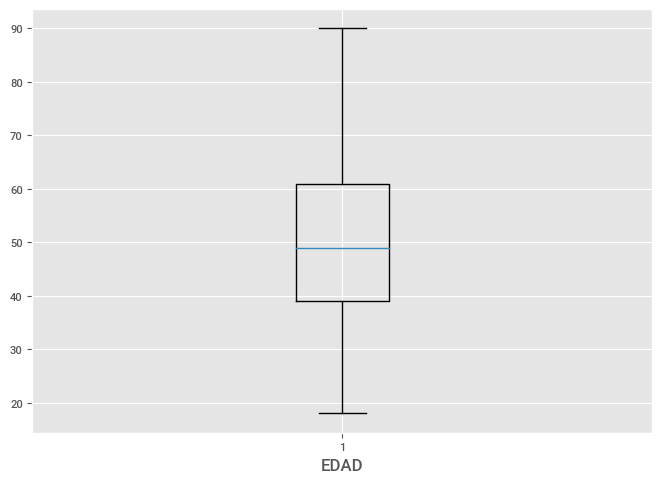

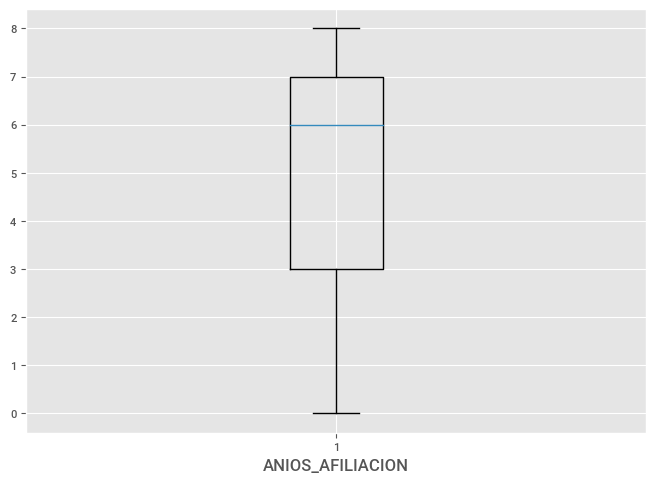

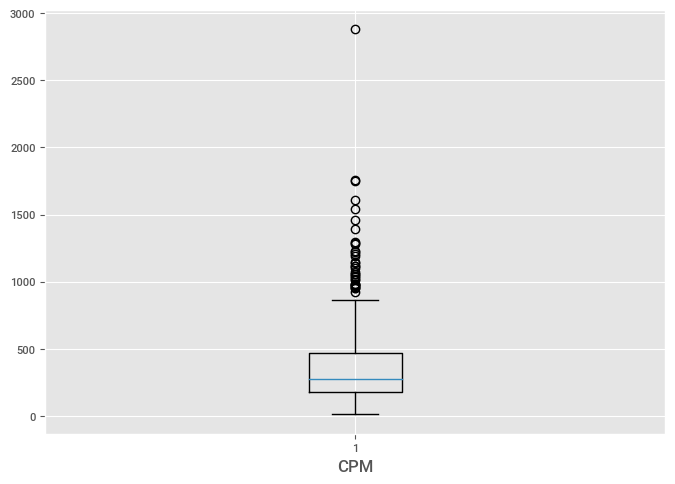

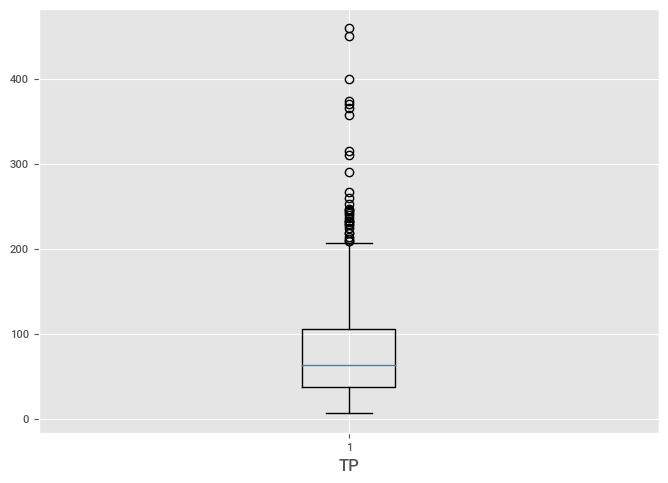

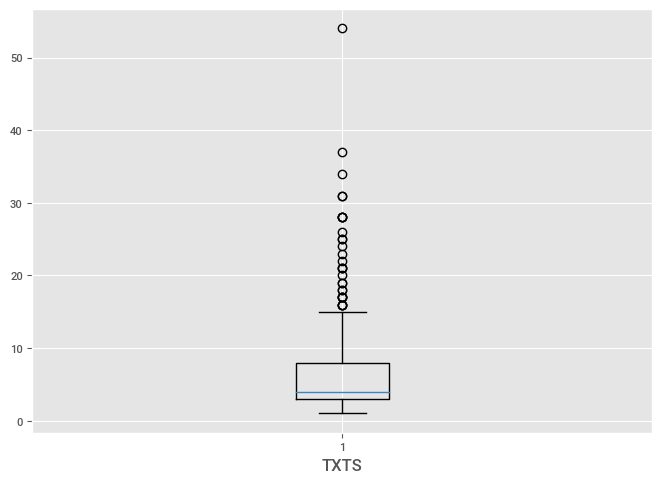

In [16]:
plt.style.use('ggplot')

for i in Num_Features:
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

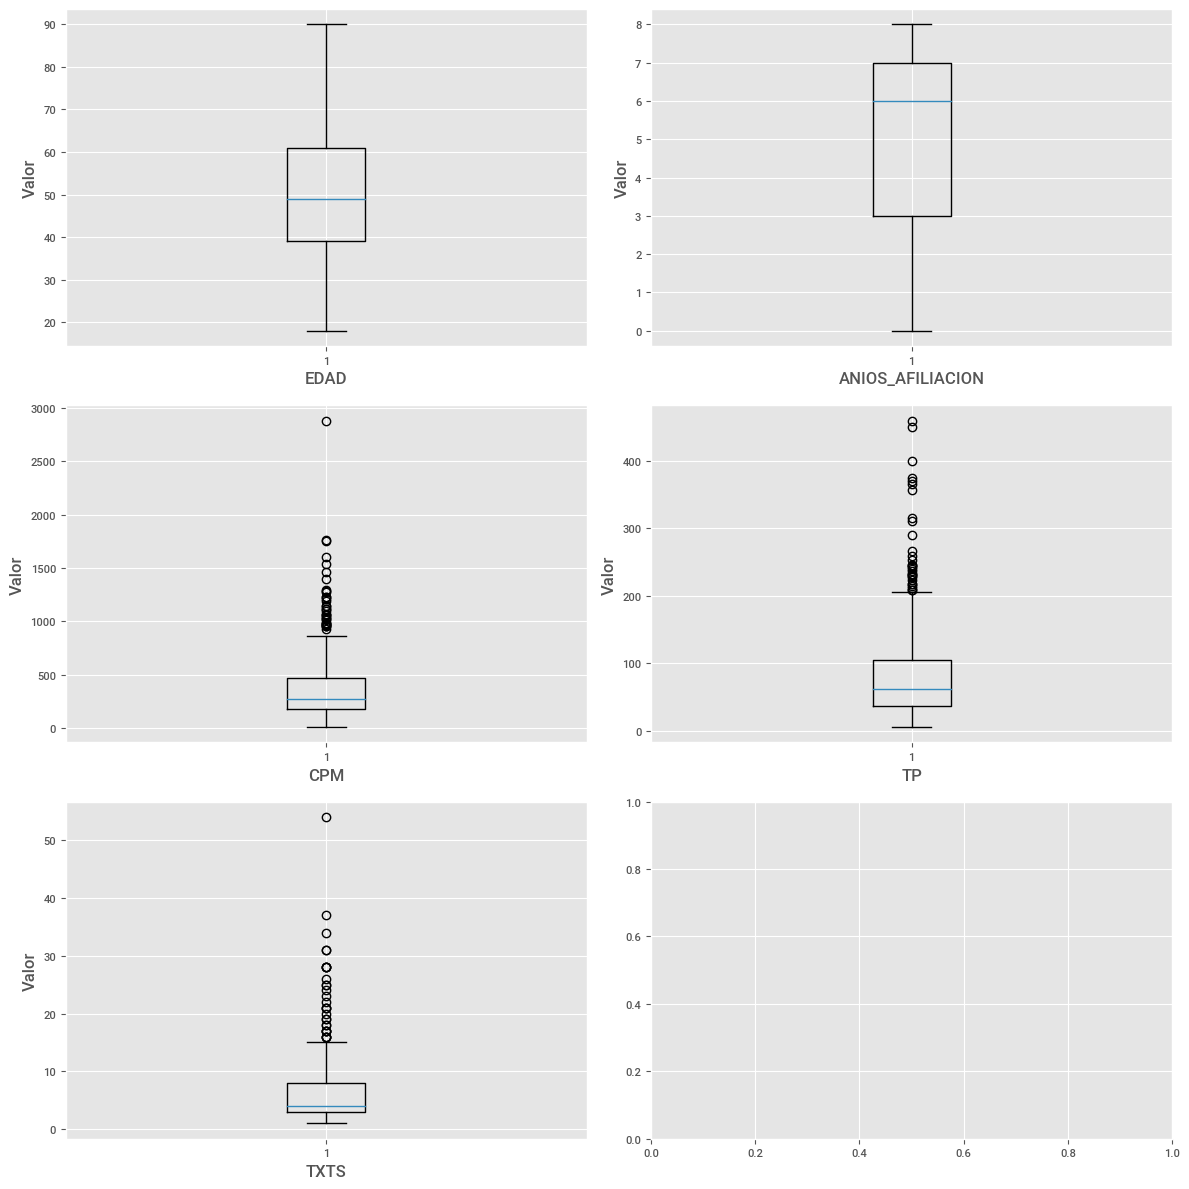

In [18]:
plt.style.use('ggplot')

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, feature in enumerate(Num_Features):
    ax = axs[i // 2, i % 2]  # Get the current subplot correctly
    ax.boxplot(data[feature])
    ax.set_xlabel(feature)
    ax.set_ylabel('Valor')
    #ax.set_title(feature)

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


We calculate the skewness coefficient and coefficient of variation

In [20]:
from scipy import stats
import pandas as pd


data_ca = {'Variable' : Num_Features,
       'Coefficient_Asim' : stats.skew(data[Num_Features])}
asim = pd.DataFrame(data_ca)
asim

,Variable,Coefficient_Asim
0,EDAD,0.299534
1,ANIOS_AFILIACION,-0.517769
2,CPM,2.587872
3,TP,2.075812
4,TXTS,2.758936


In [21]:
res_data_num = data[Num_Features].describe().transpose()
res_data_num['cv'] = res_data_num.iloc[:,2] / res_data_num.iloc[:,1] * 100
res_data_num

,count,mean,std,min,25%,50%,75%,max,cv
EDAD,500.0,50.442,14.436046,18.0,39.0,49.0,61.00,90.0,28.619100
ANIOS_AFILIACION,500.0,5.248,2.450818,0.0,3.0,6.0,7.00,8.0,46.700039
CPM,500.0,368.688,306.928730,11.0,177.0,275.5,471.25,2879.0,83.248907
TP,500.0,82.864,68.653070,6.0,37.0,63.0,105.00,459.0,82.850297
TXTS,500.0,6.286,5.990658,1.0,3.0,4.0,8.00,54.0,95.301586


**PYCARET model**

In [22]:
np.seterr(divide = 'ignore', invalid = 'ignore')
s = setup(data,
          target = 'TARGET',
          imputation_type = 'iterative',
          n_jobs=-1,
          remove_outliers = True,
          ignore_features = ['CLIENTE'],
          session_id = 123)

,Description,Value
0,Session id,123
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(500, 10)"
4,Transformed data shape,"(482, 14)"
5,Transformed train set shape,"(332, 14)"
6,Transformed test set shape,"(150, 14)"
7,Ignore features,1
8,Ordinal features,1
9,Numeric features,5


In [23]:
(get_config('y_train').value_counts())/len(get_config('y_train')) *100

0    66.285714
1    33.714286
Name: TARGET, dtype: float64

In [24]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [25]:
%%time

best = compare_models(sort='f1',
                      fold=10,
                      #include=['dt','rf','lr'],
                      n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7657,0.7746,0.5182,0.7123,0.5968,0.4382,0.4510,1.1440
knn,K Neighbors Classifier,0.7429,0.7192,0.5250,0.6509,0.5760,0.3955,0.4027,0.4720
lda,Linear Discriminant Analysis,0.7543,0.7749,0.4591,0.7107,0.5571,0.3983,0.4167,0.4170
nb,Naive Bayes,0.6229,0.7097,0.6470,0.5426,0.5569,0.2697,0.2630,0.3380
catboost,CatBoost Classifier,0.7400,0.7289,0.4932,0.6517,0.5551,0.3794,0.3895,2.0620
ada,Ada Boost Classifier,0.7171,0.7141,0.5098,0.6067,0.5479,0.3458,0.3525,0.4180
ridge,Ridge Classifier,0.7543,0.0000,0.4424,0.7244,0.5476,0.3930,0.4161,0.3440
gbc,Gradient Boosting Classifier,0.7171,0.7270,0.4841,0.6140,0.5363,0.3374,0.3455,0.4530
rf,Random Forest Classifier,0.7114,0.7297,0.4758,0.5902,0.5232,0.3211,0.3267,0.5760
xgboost,Extreme Gradient Boosting,0.6800,0.6887,0.5189,0.5286,0.5218,0.2820,0.2830,0.5050


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

CPU times: user 10.4 s, sys: 421 ms, total: 10.9 s
Wall time: 1min 42s


In [27]:
#We capture the result of the initial evaluation
best_resumen = pull()
fecha = date.today()
fecha = fecha.strftime("%Y%m%d")
best_resumen.to_excel('resultados_Mod'+fecha+'.xlsx')

In [28]:
#We review the best models in detail
mod = best[0]
evaluate_model(mod)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:
#We export graphics of the optimized model
plot_model(mod, plot = 'feature',save=True)
plot_model(mod, plot = 'feature_all',save=True)
plot_model(mod, plot = 'confusion_matrix',save=True)
plot_model(mod, plot = 'auc',save=True)
plot_model(mod, plot = 'class_report',save=True)

'Class Report.png'

In [30]:
#Training ends
modelo_final = finalize_model(mod)
save_model(modelo_final, 'modelo_propension_v1')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('iterative_imputer',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=IterativeImputer(add_indicator=False,
                                                                  cat_estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                               class_weight=None,
                                                                                               colsample_bytree=1.0,
                                                                                               importance_type='split',
                                                                                               learning_rate=0.1,
                                                                                               max_depth=-1,
                                                                              

**Production**

In [31]:
ruta_modelo = r'modelo_propension_v1'
modelo = load_model(ruta_modelo)

Transformation Pipeline and Model Successfully Loaded


In [32]:
data = {
    'CLIENTE': [1, 2, 3, 4, 5],
    'EDAD': [62, 60, 59, 47, 44],
    'ANIOS_AFILIACION': [3, 8, 7, 8, 8],
    'ESTADO_CIVIL': ['C', 'C', 'C', 'S', 'S'],
    'SEXO': ['M', 'F', 'F', 'M', 'F'],
    'CPM': [405, 387, 366, 244, 629],
    'TP': [27, 85, 44, 244, 173],
    'TXTS': [15, 5, 8, 1, 4],
    'MEDIO_PAGO': ['Efectivo', 'tc', 'tc', 'Efectivo', 'tc']
}

df = pd.DataFrame(data)

In [33]:
#We execute predictions
predicciones = predict_model(modelo,raw_score=True, data=df)

In [34]:
#I select the columns I need (Customer, conversion prediction, probability).
dfp = predicciones[['CLIENTE','prediction_label','prediction_score_1']]

In [35]:
#Customer sample
dfp.head(5)

,CLIENTE,prediction_label,prediction_score_1
0,1,1,0.5011
1,2,0,0.4593
2,3,1,0.5070
3,4,0,0.0669
4,5,0,0.4879


## Second method:

In [36]:
# Cargamos el dataset
data = pd.read_csv('campana-Marketing.csv')
data.head()

,CLIENTE,EDAD,ANIOS_AFILIACION,ESTADO_CIVIL,SEXO,CPM,TP,TXTS,MEDIO_PAGO,TARGET
0,1,62,3,C,M,405,27,15,Efectivo,0
1,2,60,8,C,F,387,85,5,tc,1
2,3,59,7,C,F,366,44,8,tc,1
3,4,47,8,S,M,244,244,1,Efectivo,0
4,5,44,8,S,F,629,173,4,tc,1


In [37]:
import pandas
# One-hot encode categorical features
data = pandas.get_dummies(data, columns=["ESTADO_CIVIL", "SEXO","MEDIO_PAGO"], drop_first=False)

print(data.head())

   CLIENTE  EDAD  ANIOS_AFILIACION  CPM   TP  TXTS  TARGET  ESTADO_CIVIL_C  \
0        1    62                 3  405   27    15       0               1   
1        2    60                 8  387   85     5       1               1   
2        3    59                 7  366   44     8       1               1   
3        4    47                 8  244  244     1       0               0   
4        5    44                 8  629  173     4       1               0   

   ESTADO_CIVIL_D  ESTADO_CIVIL_S  ESTADO_CIVIL_V  SEXO_F  SEXO_M  \
0               0               0               0       0       1   
1               0               0               0       1       0   
2               0               0               0       1       0   
3               0               1               0       0       1   
4               0               1               0       1       0   

   MEDIO_PAGO_Cualquiera  MEDIO_PAGO_Efectivo  MEDIO_PAGO_tc  
0                      0                    1        

In [38]:
data.columns.values

array(['CLIENTE', 'EDAD', 'ANIOS_AFILIACION', 'CPM', 'TP', 'TXTS',
       'TARGET', 'ESTADO_CIVIL_C', 'ESTADO_CIVIL_D', 'ESTADO_CIVIL_S',
       'ESTADO_CIVIL_V', 'SEXO_F', 'SEXO_M', 'MEDIO_PAGO_Cualquiera',
       'MEDIO_PAGO_Efectivo', 'MEDIO_PAGO_tc'], dtype=object)

In [39]:
cliente_col = data['CLIENTE']
target_col = data['TARGET']

In [40]:
df = data.drop(['CLIENTE', 'TARGET'], axis=1)

In [41]:
df.head()

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_S,ESTADO_CIVIL_V,SEXO_F,SEXO_M,MEDIO_PAGO_Cualquiera,MEDIO_PAGO_Efectivo,MEDIO_PAGO_tc
0,62,3,405,27,15,1,0,0,0,0,1,0,1,0
1,60,8,387,85,5,1,0,0,0,1,0,0,0,1
2,59,7,366,44,8,1,0,0,0,1,0,0,0,1
3,47,8,244,244,1,0,0,1,0,0,1,0,1,0
4,44,8,629,173,4,0,0,1,0,1,0,0,0,1


In [42]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df)
transformer
RobustScaler()

RobustScaler(copy=True, quantile_range=(25.0, 75.0), unit_variance=False,
             with_centering=True, with_scaling=True)

In [43]:
data_inputs_s = transformer.transform(df)

In [44]:
inputs = df.columns.tolist()

In [45]:
import pandas as pd
data_inputs_s = pd.DataFrame(data_inputs_s,columns=inputs)

In [46]:
data_inputs_s.head(3)

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_S,ESTADO_CIVIL_V,SEXO_F,SEXO_M,MEDIO_PAGO_Cualquiera,MEDIO_PAGO_Efectivo,MEDIO_PAGO_tc
0,0.590909,-0.75,0.440102,-0.529412,2.2,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0
1,0.500000,0.50,0.378929,0.323529,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.454545,0.25,0.307562,-0.279412,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data_inputs_s['TARGET'] = target_col

In [48]:
data_inputs_s.head()

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_S,ESTADO_CIVIL_V,SEXO_F,SEXO_M,MEDIO_PAGO_Cualquiera,MEDIO_PAGO_Efectivo,MEDIO_PAGO_tc,TARGET
0,0.590909,-0.75,0.440102,-0.529412,2.2,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0
1,0.500000,0.50,0.378929,0.323529,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.454545,0.25,0.307562,-0.279412,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.090909,0.50,-0.107052,2.661765,-0.6,-1.0,0.0,1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0
4,-0.227273,0.50,1.201359,1.617647,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [49]:
data_fin = data_inputs_s.copy()

In [50]:
data_fin.head()

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_S,ESTADO_CIVIL_V,SEXO_F,SEXO_M,MEDIO_PAGO_Cualquiera,MEDIO_PAGO_Efectivo,MEDIO_PAGO_tc,TARGET
0,0.590909,-0.75,0.440102,-0.529412,2.2,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0
1,0.500000,0.50,0.378929,0.323529,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.454545,0.25,0.307562,-0.279412,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,-0.090909,0.50,-0.107052,2.661765,-0.6,-1.0,0.0,1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0
4,-0.227273,0.50,1.201359,1.617647,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [51]:
data_fin.columns.values

array(['EDAD', 'ANIOS_AFILIACION', 'CPM', 'TP', 'TXTS', 'ESTADO_CIVIL_C',
       'ESTADO_CIVIL_D', 'ESTADO_CIVIL_S', 'ESTADO_CIVIL_V', 'SEXO_F',
       'SEXO_M', 'MEDIO_PAGO_Cualquiera', 'MEDIO_PAGO_Efectivo',
       'MEDIO_PAGO_tc', 'TARGET'], dtype=object)

In [52]:
X = data_fin[['EDAD', 'ANIOS_AFILIACION', 'CPM', 'TP', 'TXTS', 'ESTADO_CIVIL_C',
       'ESTADO_CIVIL_D', 'ESTADO_CIVIL_S', 'ESTADO_CIVIL_V', 'SEXO_F',
       'SEXO_M', 'MEDIO_PAGO_Cualquiera', 'MEDIO_PAGO_Efectivo',
       'MEDIO_PAGO_tc']].values
y=data_fin.iloc[:,-1].values

In [53]:
print(y)

[0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1
 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50, p=2, metric='minkowski')

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [57]:
prob_knn =knn.predict_proba(X_train)[:, 1]
np.percentile(prob_knn,[10,20,30,40,50,60,70,80,90,95,99])

array([0.14  , 0.16  , 0.194 , 0.22  , 0.26  , 0.3   , 0.36  , 0.44  ,
       0.58  , 0.66  , 0.7502])

In [58]:
prob_knn =  knn.predict_proba(X_test)[:, 1]
prob_knn

array([0.18, 0.12, 0.12, 0.24, 0.64, 0.22, 0.18, 0.3 , 0.32, 0.34, 0.3 ,
       0.52, 0.12, 0.28, 0.7 , 0.26, 0.18, 0.12, 0.3 , 0.48, 0.34, 0.1 ,
       0.26, 0.18, 0.26, 0.76, 0.44, 0.32, 0.3 , 0.28, 0.16, 0.28, 0.14,
       0.24, 0.22, 0.24, 0.36, 0.24, 0.72, 0.18, 0.5 , 0.18, 0.6 , 0.28,
       0.36, 0.28, 0.16, 0.2 , 0.14, 0.4 , 0.22, 0.16, 0.5 , 0.26, 0.6 ,
       0.28, 0.22, 0.68, 0.44, 0.48, 0.48, 0.16, 0.22, 0.3 , 0.5 , 0.46,
       0.44, 0.44, 0.4 , 0.28, 0.24, 0.16, 0.12, 0.38, 0.14, 0.64, 0.1 ,
       0.46, 0.3 , 0.2 , 0.42, 0.3 , 0.18, 0.18, 0.22, 0.7 , 0.2 , 0.26,
       0.42, 0.24, 0.2 , 0.6 , 0.26, 0.14, 0.2 , 0.3 , 0.22, 0.18, 0.18,
       0.16, 0.26, 0.84, 0.3 , 0.22, 0.26, 0.56, 0.18, 0.12, 0.5 , 0.32,
       0.52, 0.44, 0.74, 0.22, 0.22, 0.32, 0.28, 0.24, 0.28, 0.56, 0.2 ,
       0.36, 0.54, 0.4 , 0.24, 0.3 , 0.16, 0.34, 0.24, 0.22, 0.22, 0.28,
       0.2 , 0.3 , 0.14, 0.26, 0.42, 0.24, 0.24, 0.1 , 0.34, 0.2 , 0.28,
       0.22, 0.64, 0.28, 0.14, 0.16, 0.24, 0.28])

In [59]:
b = prob_knn >= 0.3
y_pred_KNN = b * 1

In [60]:
from sklearn import metrics
print ('\n \n')
print(metrics.classification_report(y_test,y_pred_KNN))


 

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        99
           1       0.46      0.55      0.50        51

    accuracy                           0.63       150
   macro avg       0.60      0.61      0.60       150
weighted avg       0.65      0.63      0.63       150



In [61]:
metrics.accuracy_score(y_test,y_pred_KNN)

0.6266666666666667

In [62]:
metrics.confusion_matrix(y_test, y_pred_KNN)

array([[66, 33],
       [23, 28]])

In [63]:
pd.crosstab(y_test,y_pred_KNN
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

Predicho,0,1
Real,,
0,66,33
1,23,28


In [64]:
metrics.log_loss(y_test,y_pred_KNN)

13.456297265270404

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=1,max_iter=1000,random_state=123)

In [66]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
prob_lgr =lgr.predict_proba(X_train)[:, 1]
np.percentile(prob_lgr,[10,20,30,40,50,60,70,80,90,95,99])

array([0.10091102, 0.12698149, 0.14989397, 0.19204138, 0.24826394,
       0.34042791, 0.42780604, 0.54562563, 0.71800988, 0.87589743,
       0.96610887])

In [68]:
prob_lgr =  lgr.predict_proba(X_test)[:, 1]
prob_lgr

array([0.08646697, 0.19280501, 0.11370814, 0.14608991, 0.83699738,
       0.33362937, 0.19719066, 0.34359377, 0.28631485, 0.36285504,
       0.31800571, 0.82077454, 0.08653881, 0.16469055, 0.97943242,
       0.24272872, 0.23668543, 0.23124355, 0.25560145, 0.51349456,
       0.42689012, 0.03574643, 0.28533611, 0.11550622, 0.32970188,
       0.96882963, 0.53846948, 0.26095066, 0.31189691, 0.21840628,
       0.09520958, 0.21776304, 0.22600911, 0.27797513, 0.159181  ,
       0.25774862, 0.36946469, 0.39364121, 0.94169449, 0.11425783,
       0.67808245, 0.11635175, 0.8452931 , 0.30946768, 0.31185216,
       0.22128155, 0.073506  , 0.24116054, 0.0967445 , 0.50065481,
       0.20565507, 0.13493797, 0.55765839, 0.1875223 , 0.48414191,
       0.30635282, 0.22241878, 0.97447279, 0.39267132, 0.51386104,
       0.69811918, 0.14696098, 0.25627627, 0.38741872, 0.61490861,
       0.60277018, 0.73379585, 0.97200172, 0.53496715, 0.29452926,
       0.20912215, 0.1490362 , 0.06452029, 0.54927249, 0.04429

In [69]:
b = prob_lgr >= 0.35
y_pred_lgr = b * 1

In [70]:
from sklearn import metrics
print ('\n \n')
print(metrics.classification_report(y_test,y_pred_lgr))


 

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.52      0.49      0.51        51

    accuracy                           0.67       150
   macro avg       0.63      0.63      0.63       150
weighted avg       0.67      0.67      0.67       150



In [71]:
metrics.accuracy_score(y_test,y_pred_lgr)

0.6733333333333333

In [72]:
metrics.confusion_matrix(y_test, y_pred_lgr)

array([[76, 23],
       [26, 25]])

In [74]:
pd.crosstab(y_test,y_pred_lgr
                  ,rownames = ['Real']
                  ,colnames = ['Predicted'])

Predicted,0,1
Real,,
0,76,23
1,26,25


In [75]:
metrics.log_loss(y_test,y_pred_lgr)

11.774260107111603

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, prob_lgr)

auc = roc_auc_score(y_test, prob_lgr)
print('AUC: %.3f' % auc)

AUC: 0.692


No Skill: ROC AUC=0.500
Modelo: ROC AUC=0.692


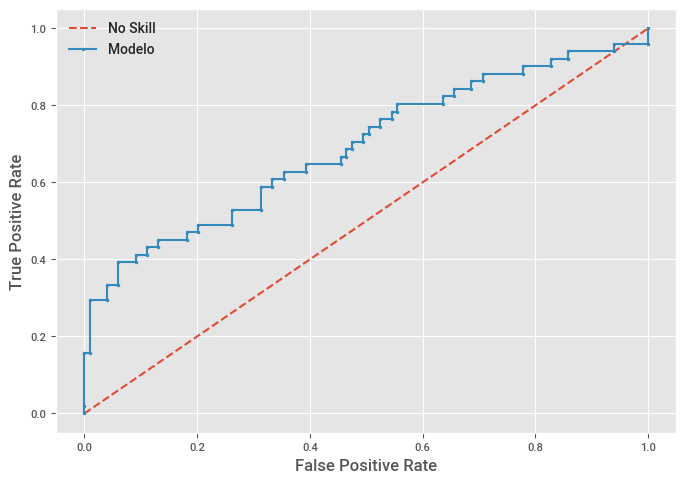

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]

lr_probs = prob_lgr

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Modelo: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)


plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Modelo')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [78]:
####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################

def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [79]:
X_test_df = pd.DataFrame(X_test,columns=['EDAD', 'ANIOS_AFILIACION', 'CPM', 'TP', 'TXTS', 'ESTADO_CIVIL_C',
       'ESTADO_CIVIL_D', 'ESTADO_CIVIL_S', 'ESTADO_CIVIL_V', 'SEXO_F',
       'SEXO_M', 'MEDIO_PAGO_Cualquiera', 'MEDIO_PAGO_Efectivo',
       'MEDIO_PAGO_tc'])
X_test_df.head(3)

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_S,ESTADO_CIVIL_V,SEXO_F,SEXO_M,MEDIO_PAGO_Cualquiera,MEDIO_PAGO_Efectivo,MEDIO_PAGO_tc
0,0.136364,-1.5,0.351742,1.867647,-0.4,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0
1,-0.636364,-1.0,0.073067,0.691176,-0.2,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.090909,-1.0,-0.705183,-0.632353,-0.2,-1.0,0.0,1.0,0.0,-1.0,1.0,0.0,1.0,-1.0


In [80]:
y_test_df = pd.DataFrame(y_test,columns=['TARGET'])
y_test_df.head(3)

,TARGET
0,0
1,0
2,0


In [81]:
data_test_df = pd.concat([X_test_df,y_test_df],axis=1)
data_test_df.head(3)

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_S,ESTADO_CIVIL_V,SEXO_F,SEXO_M,MEDIO_PAGO_Cualquiera,MEDIO_PAGO_Efectivo,MEDIO_PAGO_tc,TARGET
0,0.136364,-1.5,0.351742,1.867647,-0.4,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0
1,-0.636364,-1.0,0.073067,0.691176,-0.2,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.090909,-1.0,-0.705183,-0.632353,-0.2,-1.0,0.0,1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0


In [82]:
# Add prediction probability to dataframe
data_test_df['pred_proba'] = prob_lgr
data_test_df.head(3)

,EDAD,ANIOS_AFILIACION,CPM,TP,TXTS,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_S,ESTADO_CIVIL_V,SEXO_F,SEXO_M,MEDIO_PAGO_Cualquiera,MEDIO_PAGO_Efectivo,MEDIO_PAGO_tc,TARGET,pred_proba
0,0.136364,-1.5,0.351742,1.867647,-0.4,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0,0.086467
1,-0.636364,-1.0,0.073067,0.691176,-0.2,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.192805
2,-0.090909,-1.0,-0.705183,-0.632353,-0.2,-1.0,0.0,1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0,0.113708


In [83]:
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(data_test_df['TARGET'], data_test_df['pred_proba'])
threshold

[0.28631484644751093]